In [9]:
%load_ext autoreload
%autoreload 2
from easing import easing
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
x_array = np.linspace(0, 2*np.pi, 100)

kfs = []
for i in np.linspace(0, 1, 5):
    y_array = np.sin(x_array/0.1 + 2*np.pi*i)*0.3

    keyframe_df = pd.DataFrame({
        "x": x_array,
        "y": y_array
    })

    kf_flattened = keyframe_df[["x", "y"]].to_numpy().reshape(1,-1)
    kfs.append(kf_flattened)

data_df = pd.DataFrame(np.vstack(kfs))
eased_polyline = easing.Eased(data_df, wrap=False)
eased_polyline.power_ease(n=1, fpt=10)

In [24]:
keyframe1_df = pd.DataFrame({
    "x": [1.0, 1.0, 2.0, 2.0],
    "y": [2.0, 3.0, 3.0, 2.0]})

keyframe2_df = pd.DataFrame({
    "x": [1.0, 1.0, 2.0, 2.0],
    "y": [-0.5, 0.5, 0.5, -0.5]})

kf1_flattened = keyframe1_df[["x", "y"]].to_numpy().reshape(1,-1)
kf2_flattened = keyframe2_df[["x", "y"]].to_numpy().reshape(1,-1)

data_df = pd.DataFrame(np.vstack([kf1_flattened, kf2_flattened]))
eased_polygon = easing.Eased(data_df, wrap=False)
eased_polygon.overshoot_ease(freq=0.1, fpt=20, fstall=True)

MovieWriter imagemagick unavailable; using Pillow instead.


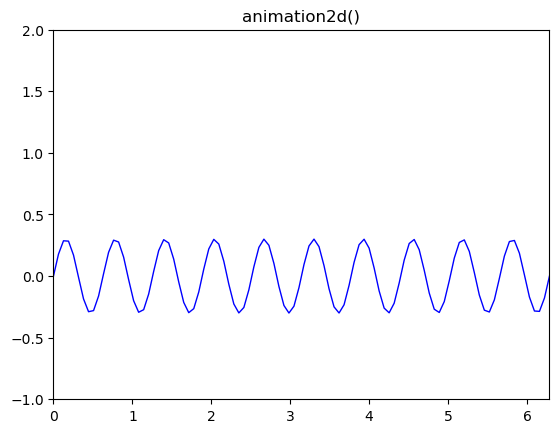

In [25]:
eased_list = [eased_polyline, eased_polygon]
anim_type = ['line', 'polygon']

easing.animation2d(eased_list, anim_type, duration=0.7, 
                   feats_kws=[{'color':'blue'}, {'facecolor':'k'}],
                   ax_kws={'xlim':(0, 2*np.pi), 'ylim':(-1, 2), 'title':'animation2d()'}, 
                   destination='media/falling_box.gif',
                   )